In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [16]:
df = pd.read_csv('Fertilizer Prediction.csv')

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())


First 5 rows of the dataset:
   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  

Dataset Shape: (99, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humi

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Soil Type'] = le.fit_transform(df['Soil Type'])
df['Crop Type'] = le.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = le.fit_transform(df['Fertilizer Name'])

x = df.drop('Fertilizer Name', axis=1)  # Features
y = df['Fertilizer Name']               # Target

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
!pip install xgboost

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


In [54]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

In [56]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

In [62]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize and train the model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

In [64]:
print("\nDecision Tree Metrics:")
print(f"MAE: {dt_mae:.4f}")
print(f"MSE: {dt_mse:.4f}")
print(f"R2 Score: {dt_r2:.4f}")
print(f"Accuracy: {dt_accuracy:.4f}")

print("\nGradient Boosting Metrics:")
print(f"MAE: {gb_mae:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"R2 Score: {gb_r2:.4f}")
print(f"Accuracy: {gb_accuracy:.4f}")

print("\nK-Nearest Neighbors Metrics:")
print(f"MAE: {knn_mae:.4f}")
print(f"MSE: {knn_mse:.4f}")
print(f"R2 Score: {knn_r2:.4f}")
print(f"Accuracy: {knn_accuracy:.4f}")

print("\nXGBoost Metrics:")
print(f"MAE: {xgb_mae:.4f}")
print(f"MSE: {xgb_mse:.4f}")
print(f"R2 Score: {xgb_r2:.4f}")
print(f"Accuracy: {xgb_accuracy:.4f}")


Decision Tree Metrics:
MAE: 0.2000
MSE: 0.3000
R2 Score: 0.9140
Accuracy: 0.8500

Gradient Boosting Metrics:
MAE: 0.2000
MSE: 0.8000
R2 Score: 0.7706
Accuracy: 0.9500

K-Nearest Neighbors Metrics:
MAE: 0.1500
MSE: 0.2500
R2 Score: 0.9283
Accuracy: 0.9000

XGBoost Metrics:
MAE: 0.0000
MSE: 0.0000
R2 Score: 1.0000
Accuracy: 1.0000


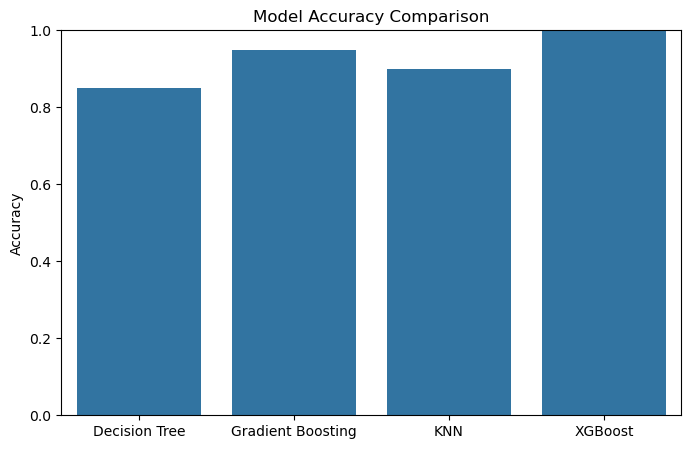

In [66]:
plt.figure(figsize=(8, 5))
model_names = ['Decision Tree', 'Gradient Boosting', 'KNN', 'XGBoost']
accuracies = [dt_accuracy, gb_accuracy, knn_accuracy, xgb_accuracy]
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


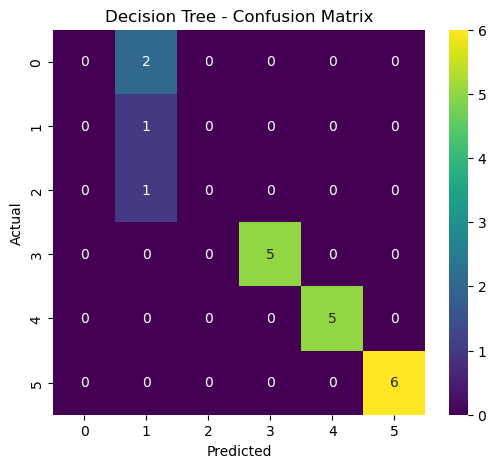

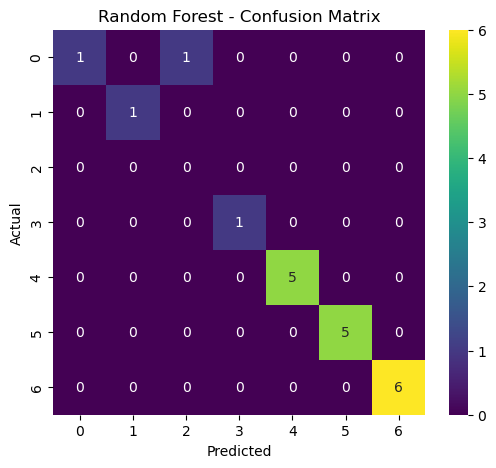

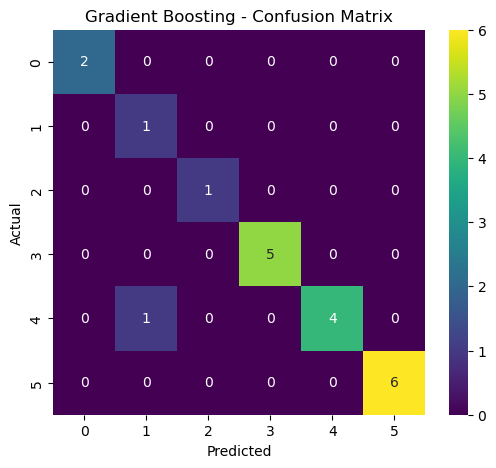

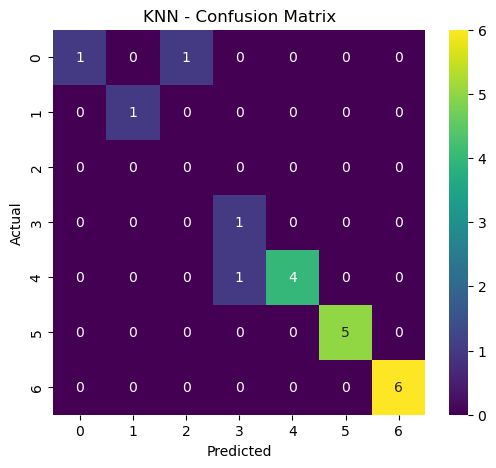

In [44]:
conf_matrices = [dt_cm, rf_cm, gb_cm, knn_cm]
for i, cm in enumerate(conf_matrices):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
    plt.title(f'{model_names[i]} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

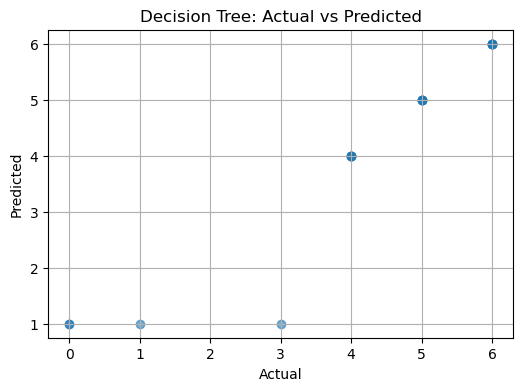

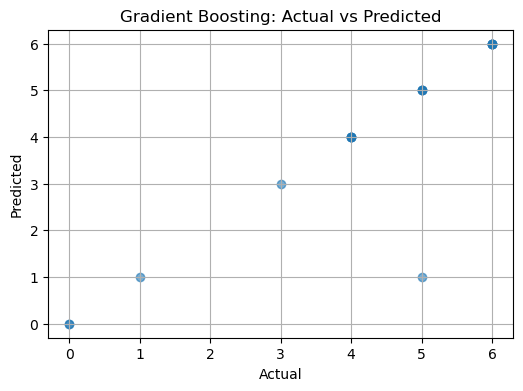

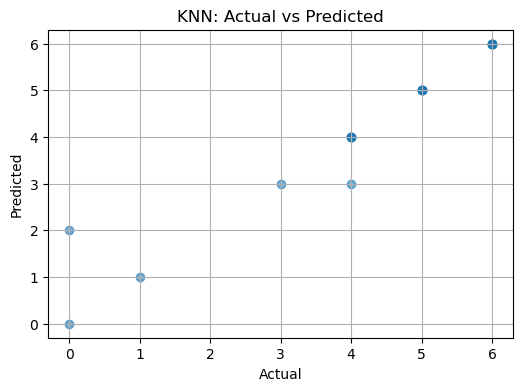

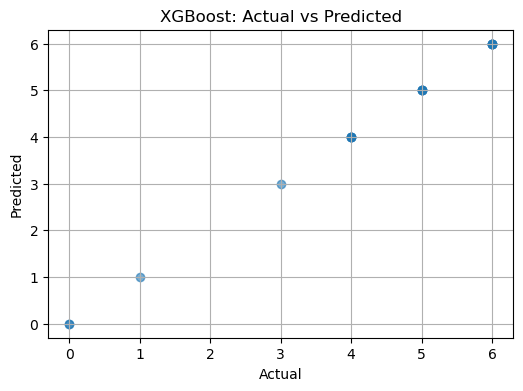

In [68]:
predictions = [dt_pred, gb_pred, knn_pred, xgb_pred]
for i, pred in enumerate(predictions):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, pred, alpha=0.6)
    plt.title(f'{model_names[i]}: Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()